# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Loading Data

The sample data is relevant to the oil & gas industry. It is originally from Dr. Michael Pyrcz, petroleum engineering professor at the University of Texas at Austin.

Description of headers

Well : well index
Por : well average porosity (%)
Perm : permeability (mD)
AI : accoustic impedance (kg/m2s*10^6)
Brittle : brittleness ratio (%)
TOC : total organic carbon (%)
VR : vitrinite reflectance (%)
Prod : gas production per day (MCFD)

In [2]:
df = pd.read_excel('Production_Data.xlsx')
df

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832
...,...,...,...,...,...,...,...,...
195,196,11.95,3.13,2.97,67.18,0.80,2.06,3847.571003
196,197,17.99,9.87,3.38,44.32,0.98,2.08,5601.227131
197,198,12.12,2.27,3.52,57.07,-0.04,1.73,3409.575363
198,199,15.55,4.48,2.48,58.25,1.89,2.35,5087.592149


# Preprocessing and Analysis

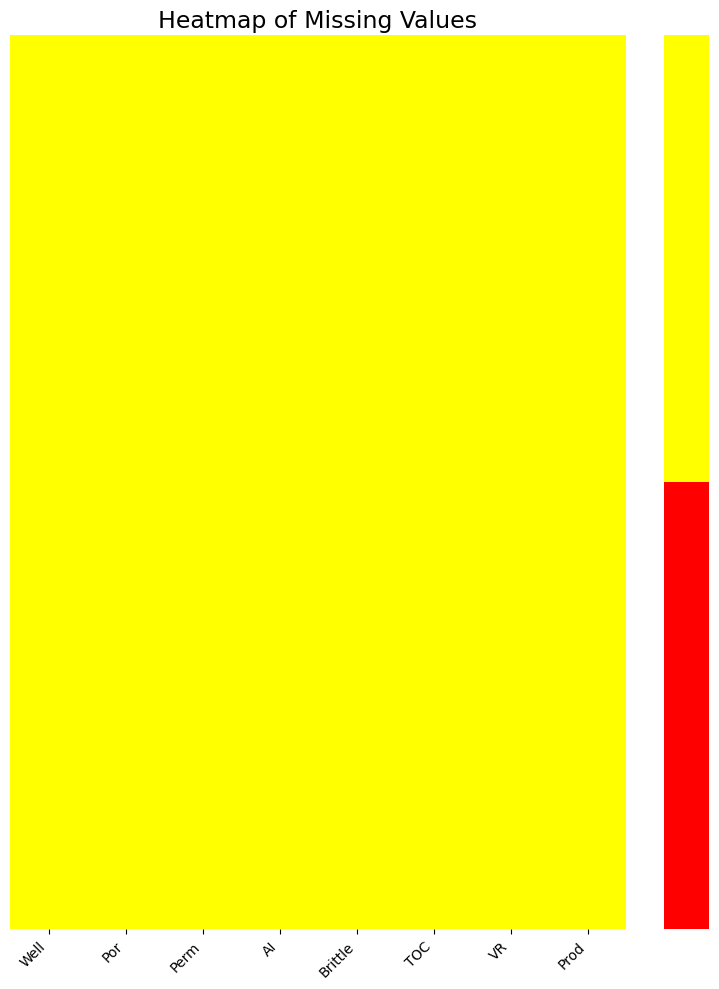

In [3]:
plt.figure(figsize=(8, 10))

heatmap = sns.heatmap(df.isna(), 
                      cmap=['red', 'yellow'],
                      cbar_kws={'ticks': []},
                      xticklabels=True,
                      yticklabels=False)

colorbar = heatmap.collections[0].colorbar
colorbar.set_label('') 

ax = plt.gca()
ax.set_title('Heatmap of Missing Values', fontsize=17)
plt.xticks(rotation=45, ha='right')  

plt.tight_layout()

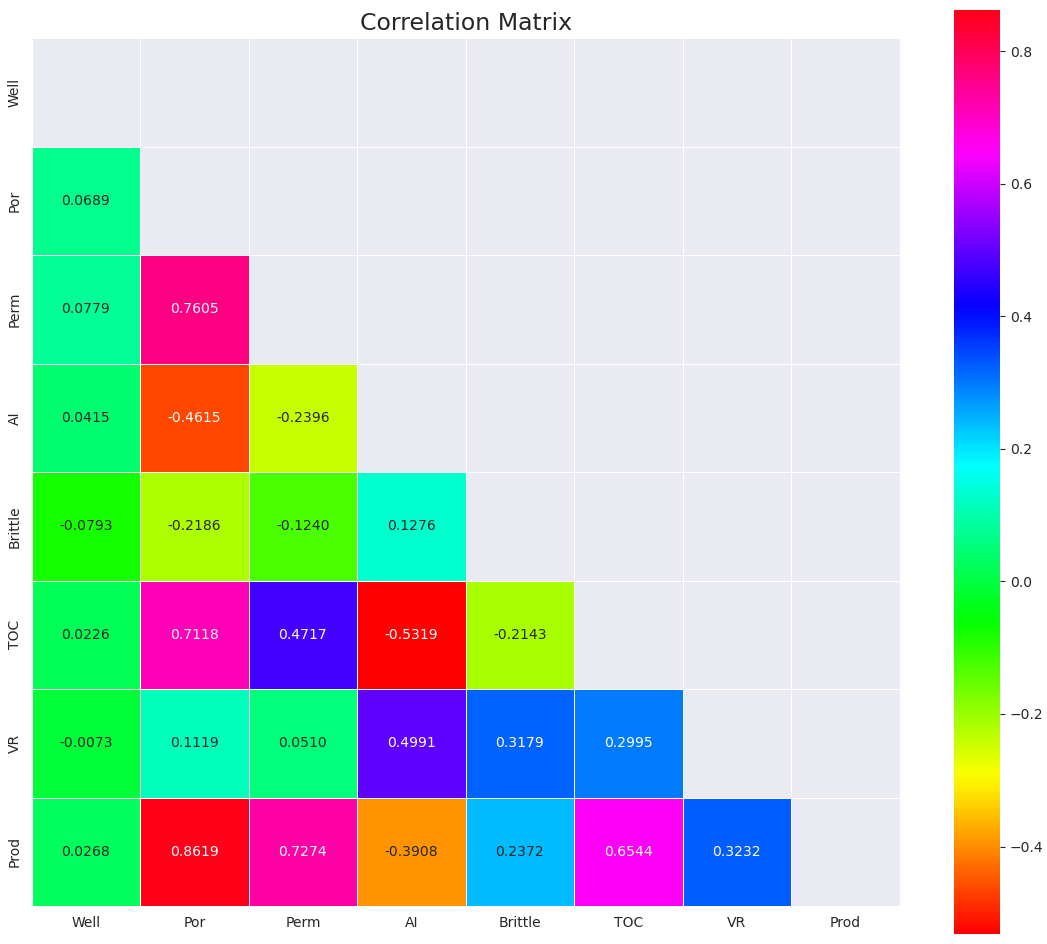

In [4]:
numeric_data = df.select_dtypes(include=np.number)
corr = numeric_data.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("dark"):
    f, ax = plt.subplots(figsize=(14, 12))
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, fmt='0.4f', linewidths=.4, cmap="hsv")
    ax.set_title('Correlation Matrix', fontsize=17)

# Splitting Data

In [5]:
X = df[['Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR',]]
y = df['Prod']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

# Applying Models

In [6]:
regressors = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Extra Tree': ExtraTreesRegressor()
}

# Evaluating Models

In [7]:
results = {}

for name, model in regressors.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    results[name] = {
        "R2 Score": r2,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "Mean Absolute Percentage Error": mape
    }

In [8]:
results_df = pd.DataFrame(results).T
results_df

,R2 Score,Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error
Decision Tree,0.898963,85498.219898,221.947474,0.055946
Random Forest,0.967900,27163.579654,132.853609,0.033700
Extra Tree,0.983871,13648.682492,90.585021,0.023637


## Evaluation Metrics

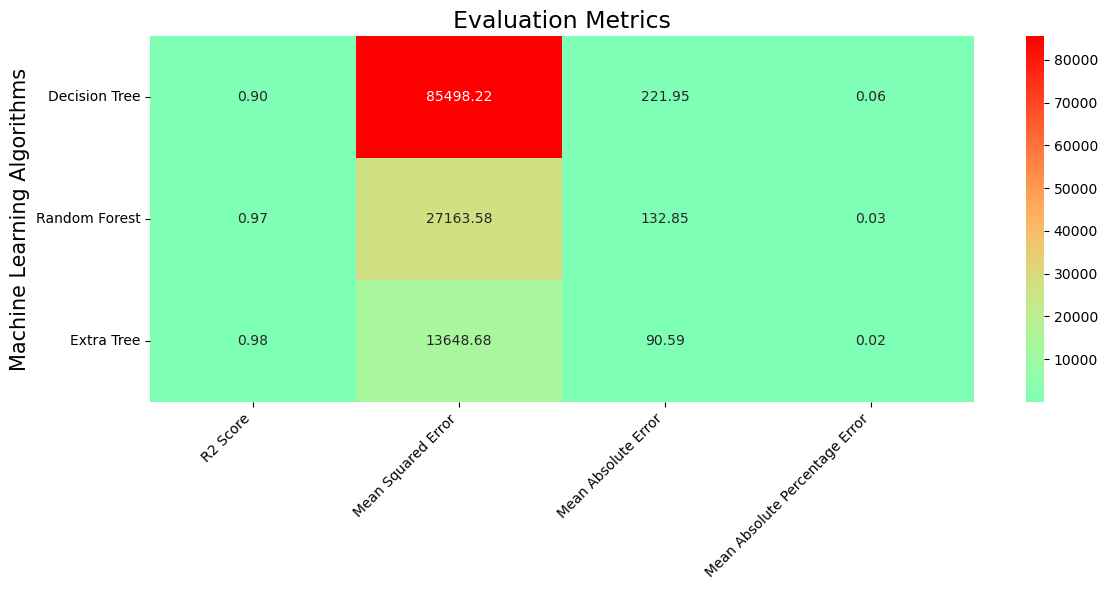

In [9]:
plt.figure(figsize=(12, 6))
sns.heatmap(results_df, annot=True, fmt='.2f', cmap="rainbow", center=0.5)
plt.ylabel("Machine Learning Algorithms", fontsize=15)
plt.title("Evaluation Metrics", fontsize=17)
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0) 
plt.tight_layout()
plt.show()


## R² Score

In [10]:
reg_pred = []
print('Results...\n')
for name, model in regressors.items():
    model.fit(X_train, y_train)
    yp = model.predict(X_test)
    r2 = r2_score(y_test, yp)
    reg_pred.append(r2)
    print(name, r2)


Results...

Decision Tree 0.9010865521773174
Random Forest 0.967146193370392
Extra Tree 0.9841167915518554


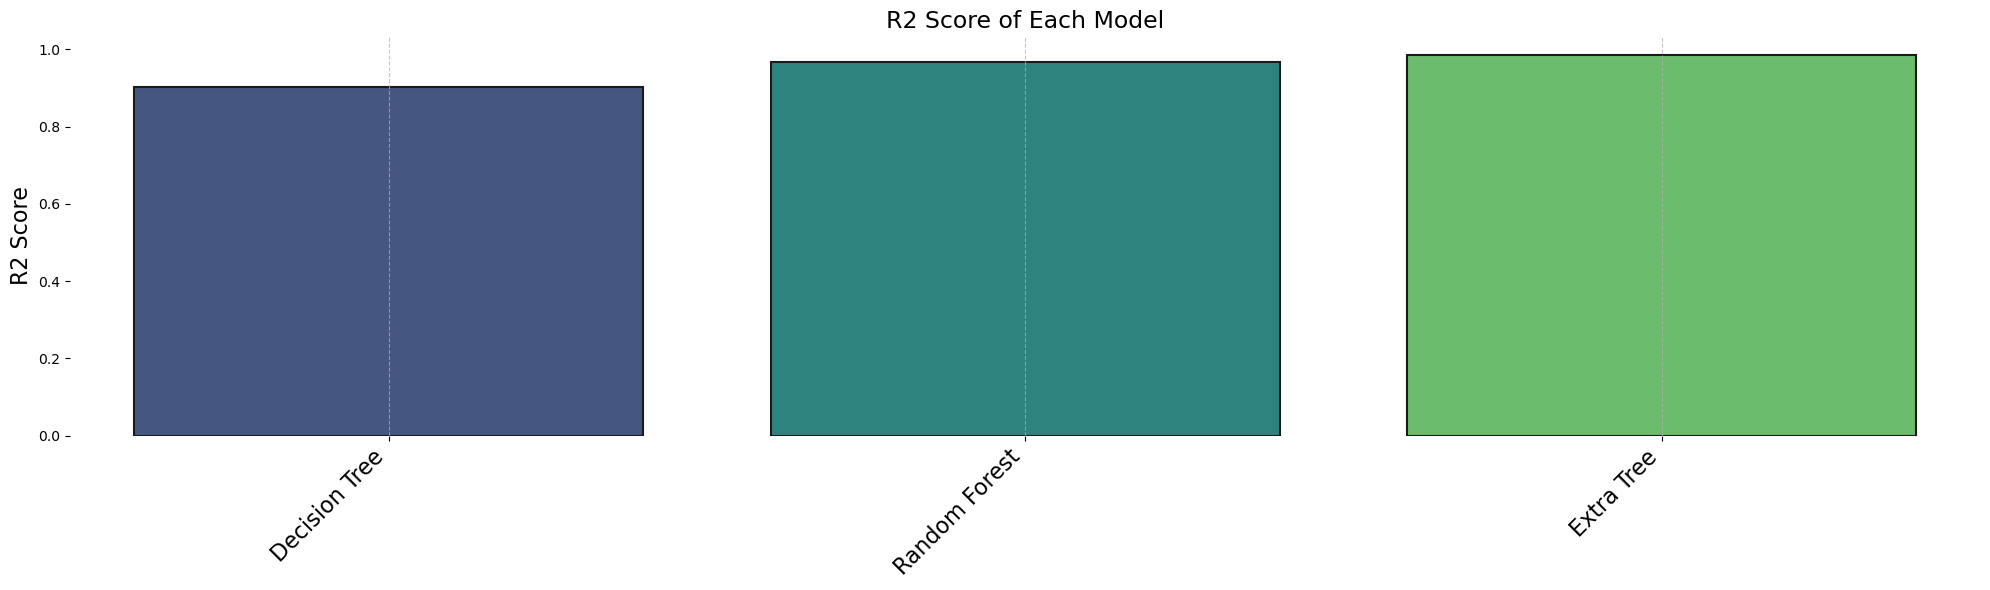

In [11]:
y_ax=['Decision Tree', 'Random Forest','Extra Tree' ]
x_ax=reg_pred
plt.figure(figsize=(20, 6))
sns.barplot(x=y_ax,y=x_ax,linewidth=1.5,edgecolor="0.1", hue=y_ax, palette="viridis")
plt.ylabel('R2 Score',fontsize=16)
plt.xticks(rotation=45, ha='right',fontsize=16)  
plt.title("R2 Score of Each Model", fontsize=17)
sns.despine(left=True, bottom=True)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Cross Validation

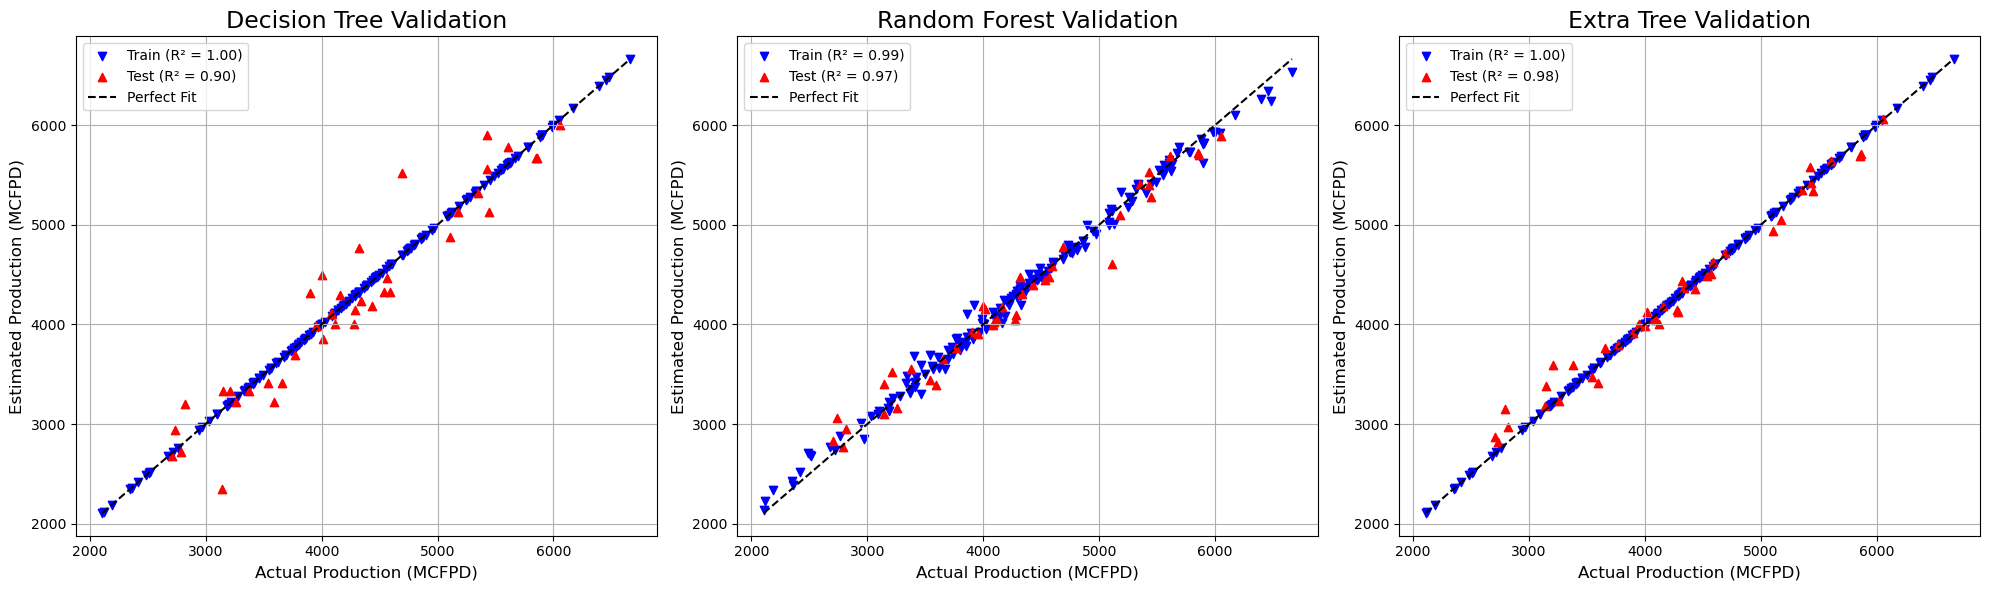

In [12]:
plt.figure(figsize=(20, 6))

for i, (name, model) in enumerate(regressors.items(), 1):
    model.fit(X_train, y_train) 
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    plt.subplot(1, 3, i)
    plt.scatter(y_train, y_pred_train, color='blue', label=f'Train (R² = {r2_train:.2f})', marker='v')
    plt.scatter(y_test, y_pred_test, color='red', label=f'Test (R² = {r2_test:.2f})', marker='^')
    plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', label='Perfect Fit')

    plt.xlabel('Actual Production (MCFPD)', fontsize=12)
    plt.ylabel('Estimated Production (MCFPD)', fontsize=12)
    plt.title(f'{name} Validation', fontsize=17)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

## Impurity Based Feature Importance

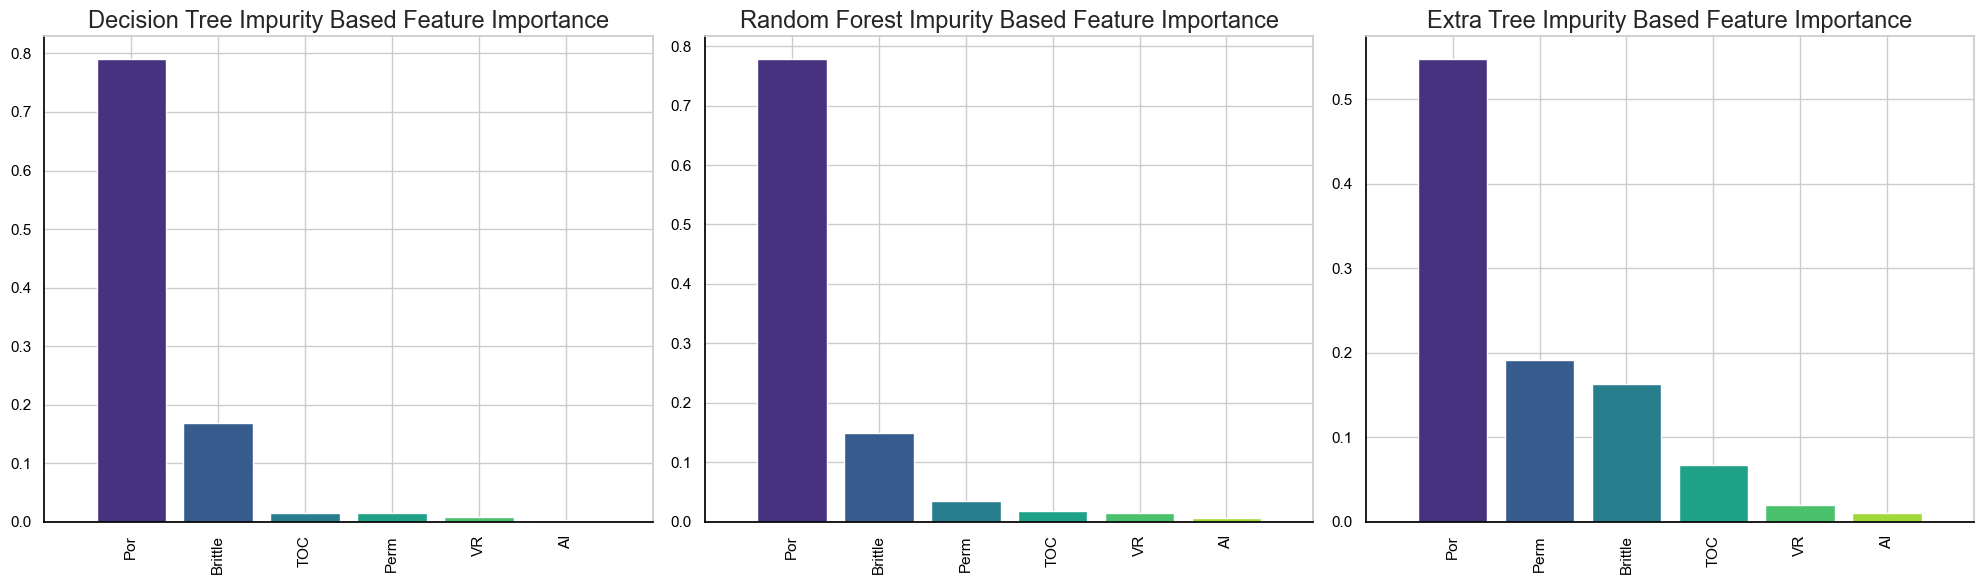

In [13]:
plt.figure(figsize=(20, 6))
colors = sns.color_palette("viridis", len(range(X_train.shape[1])))
sns.set(style='whitegrid')

for i, (name, model) in enumerate(regressors.items(), 1):
    importance_val = model.feature_importances_
    indices = np.argsort(importance_val)[::-1]

    plt.subplot(1, 3, i)
    plt.title(f'{name} Impurity Based Feature Importance', fontsize=17)
    plt.bar(range(X_train.shape[1]), importance_val[indices], color=colors)
    plt.xticks(range(X_train.shape[1]), df.columns[1:][indices], rotation=90)
    plt.xlim([-1, X_train.shape[1]])

    ax = plt.gca()
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')

plt.tight_layout()
plt.show()

# Permutation Based Feature Importance

In [18]:
def get_perm_importance(models, X, y, features, n=10):
    """
    Calculate permutation importance score for each feature across multiple models.
    
    Parameters:
    models: Dictionary of trained models {name: model}
    X: Feature matrix (DataFrame or numpy array)
    y: Target values (Series or array)
    features: List of feature names
    n: Number of permutations to average
    
    Returns:
    Dictionary containing feature importance scores for each model.
    """
    
    model_importance_scores = {}

    for model_name, model in models.items():
        print(f"Calculating permutation importance for model: {model_name}")
        
        # Calculate baseline score (without permuting any feature)
        baseline_score = model.score(X, y)
        importance_scores = {}

        # Loop over each feature
        for feature in features:
            sum_score = 0

            # Repeat n times to get an average importance score
            for _ in range(n):
                X_perm = X.copy()  # Fresh copy to avoid accumulation
                X_perm[feature] = np.random.permutation(X_perm[feature])  # Permute feature values
                permuted_score = model.score(X_perm, y)
                sum_score += permuted_score

            # Calculate the average decrease in score
            importance_score = baseline_score - (sum_score / n)
            importance_scores[feature] = importance_score

        model_importance_scores[model_name] = importance_scores

    return model_importance_scores


In [19]:
# Example: Assuming `regressors` is your dictionary of trained models
importance_scores = get_perm_importance(regressors, X_train, y_train, X_train.columns)

# Display results
for model, scores in importance_scores.items():
    print(f"Feature importance for {model}:")
    for feature, importance in scores.items():
        print(f"  {feature}: {importance:.4f}")

Calculating permutation importance for model: Decision Tree
Calculating permutation importance for model: Random Forest
Calculating permutation importance for model: Extra Tree
Feature importance for Decision Tree:
  Por: 1.3629
  Perm: 0.0504
  AI: 0.0065
  Brittle: 0.3906
  TOC: 0.0454
  VR: 0.0155
Feature importance for Random Forest:
  Por: 1.2888
  Perm: 0.0163
  AI: 0.0020
  Brittle: 0.2953
  TOC: 0.0121
  VR: 0.0054
Feature importance for Extra Tree:
  Por: 0.9888
  Perm: 0.0705
  AI: 0.0020
  Brittle: 0.2841
  TOC: 0.0210
  VR: 0.0047


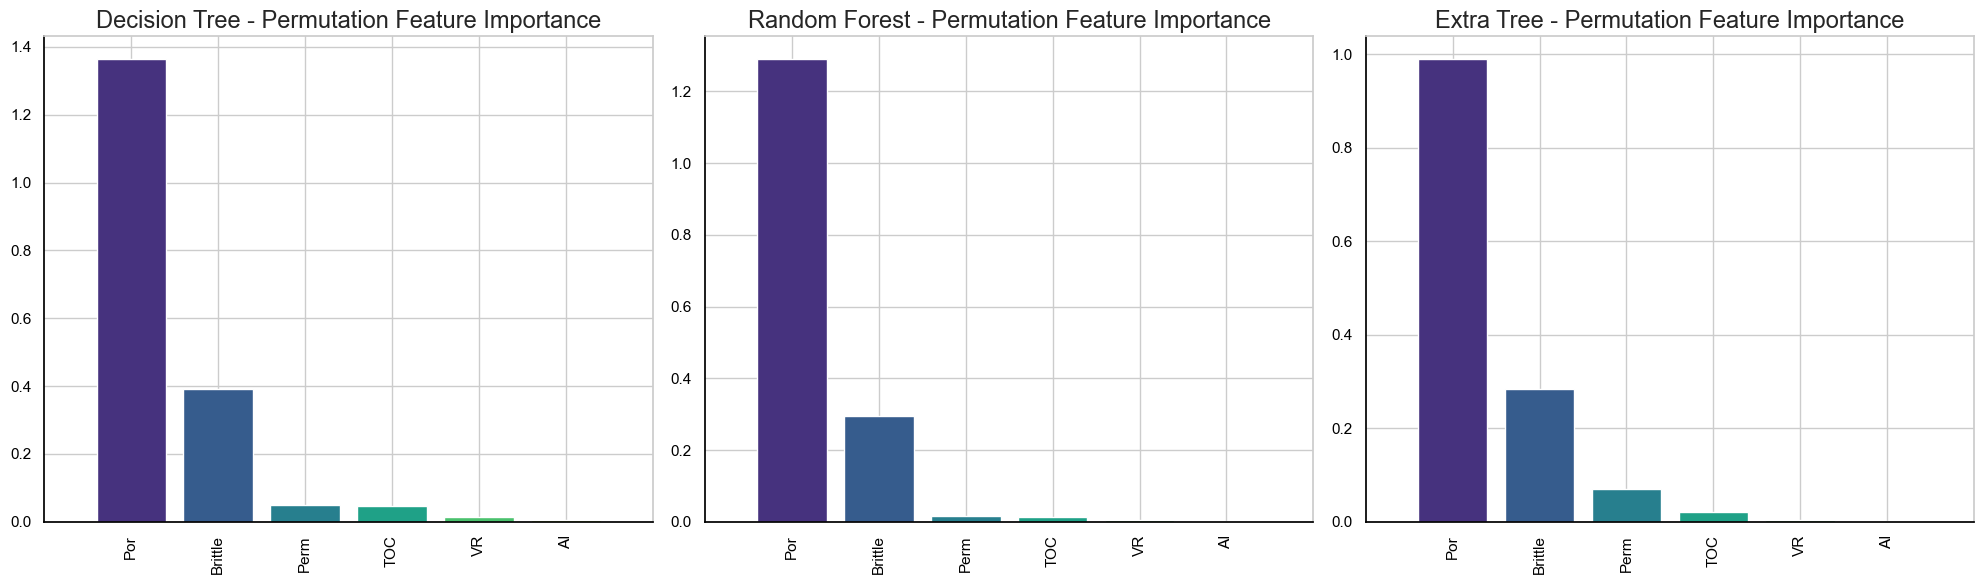

In [20]:
plt.figure(figsize=(20, 6))
sns.set(style='whitegrid')

colors = sns.color_palette("viridis", len(next(iter(importance_scores.values()))))

for i, (name, feature_scores) in enumerate(importance_scores.items(), 1):
    # Convert dictionary to sorted list (descending order)
    features, importance_vals = zip(*sorted(feature_scores.items(), key=lambda x: x[1], reverse=True))

    plt.subplot(1, len(importance_scores), i)
    plt.title(f'{name} - Permutation Feature Importance', fontsize=17)
    plt.bar(range(len(features)), importance_vals, color=colors)
    plt.xticks(range(len(features)), features, rotation=90)
    plt.xlim([-1, len(features)])

    ax = plt.gca()
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')

plt.tight_layout()
plt.show()